Цель проекта - показать что выручка разных тарифов отличается и выделить основные признаки этого отличия. 
В качестве исходных данных у нас данные о расходах клиентов двух тарифов в части мобильной связи, сообщений и интернет-траффика. Зная параметры каждого из двух тарифов мы можем 
рассчитать расходы клиентов и определить корреляцию между величиной этих расходов и входящими параметрами.
Для решения этой задачи будет удобно сделать расчет расходов каждого клиента помесячно. Соответствующие характеристики будем определять пользуясь средствами работы с данными, наглядными графиками и аналитическими функциями.


### Вы аналитик компании «Мегалайн» — федерального оператора сотовой связи.

In [1]:
import pandas as pd
import numpy as np

pd.options.display.max_columns = None

In [2]:
source = {'calls':None, 'internet':None, 'messages':None, 'tariffs':None, 'users':None}



для отображения границ у таблиц:

In [3]:
%%HTML
<style type="text/css">
table.dataframe td, table.dataframe th {
    border: 1px  black solid !important;
  color: black !important;
}
</style>

In [4]:
for key, value in source.items():
    pathe = r'/datasets/'+key+'.csv'
    source[key] = pd.read_csv(pathe)

In [5]:
for key, value in source.items():
    print('------------------------------------------'+str(key))
    source[key].info()    

    print(source[key].head(5))
    print(source[key].columns)
    print("\n\n")

------------------------------------------calls
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB
       id   call_date  duration  user_id
0  1000_0  2018-07-25      0.00     1000
1  1000_1  2018-08-17      0.00     1000
2  1000_2  2018-06-11      2.85     1000
3  1000_3  2018-09-21     13.80     1000
4  1000_4  2018-12-15      5.18     1000
Index(['id', 'call_date', 'duration', 'user_id'], dtype='object')



------------------------------------------internet
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------   

**Вывод:** Мы получили информацию о количестве и типах данных, о пропусках и названиях колонок.

**Дополнение**:
В ряде колонок есть пропуски, их необходимо заполнить. Типы данных в основном количественные и в формате даты. Некоторые из них необходимо привести к данному формату.

In [6]:
source['users']['churn_date'].fillna(pd.datetime(2018, 12, 31), inplace = True)

/tmp/ipykernel_54/1446982383.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  source['users']['churn_date'].fillna(pd.datetime(2018, 12, 31), inplace = True)


### Шаг 2. Подготовьте данные

####     Приведите данные к нужным типам;

In [7]:
source['calls']['call_date']=pd.to_datetime(source['calls']['call_date'], format='%Y-%m-%d')
source['internet']['session_date']=pd.to_datetime(source['internet']['session_date'], format='%Y-%m-%d')
source['messages']['message_date']=pd.to_datetime(source['messages']['message_date'], format='%Y-%m-%d')
source['users']['churn_date']=pd.to_datetime(source['users']['churn_date'], format='%Y-%m-%d')
source['users']['reg_date']=pd.to_datetime(source['users']['reg_date'], format='%Y-%m-%d')

   

~~source['internet'].rename(columns={"Unnamed: 0": "nums"})~~

In [8]:
source['internet'] = source['internet'].drop('Unnamed: 0', axis=1)

**Вывод:** Мы преобразовали столбы данных содержащие метку времени к формату даты. И удалили ненужные данные.

~~     Шаг 2. Подготовьте данные Найдите и исправьте ошибки в данных, если они есть.~~

##### Подготовьте данные

In [9]:
source['users']=source['users'].merge(right=source['tariffs'], left_on = 'tariff', right_on='tariff_name' )

**Вывод:** дф пользователи содержит информацию о  тарифах каждого.

###### округление calls

**Примечание:**

«Мегалайн» всегда округляет секунды до минут, а мегабайты — до гигабайт. Каждый звонок округляется отдельно: даже если он длился всего 1 секунду, будет засчитан как 1 минута.



In [10]:
source['calls'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         202607 non-null  object        
 1   call_date  202607 non-null  datetime64[ns]
 2   duration   202607 non-null  float64       
 3   user_id    202607 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 6.2+ MB


In [11]:
source['calls']['duration'].head(5)

0     0.00
1     0.00
2     2.85
3    13.80
4     5.18
Name: duration, dtype: float64

In [12]:
source['calls']['duration'] = source['calls']['duration'].apply(np.ceil)

In [13]:
source['calls']['duration']

0          0.0
1          0.0
2          3.0
3         14.0
4          6.0
          ... 
202602     1.0
202603    19.0
202604    11.0
202605     5.0
202606    20.0
Name: duration, Length: 202607, dtype: float64

**Вывод:** Теперь учтено округление

###### calls  <a class="anchor" id="chapter1"></a>

In [14]:
source['calls']['month']=source['calls']['call_date'].dt.month
source['calls_month']= source['calls'].pivot_table(
    index=('user_id','month'),
    values=('duration'),
    aggfunc=('count','sum')
).fillna(0).reset_index(level=1)
source['calls_month']=source['calls_month'].merge(right=source['users'], left_on = 'user_id', right_on='user_id' )
source['calls_month']

,user_id,month,count,sum,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,1000,5,22,159.0,52,2018-12-31,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,ultra
1,1000,6,43,172.0,52,2018-12-31,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,ultra
2,1000,7,47,340.0,52,2018-12-31,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,ultra
3,1000,8,52,408.0,52,2018-12-31,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,ultra
4,1000,9,58,466.0,52,2018-12-31,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,ultra
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3169,1498,10,41,247.0,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart,50,15360,500,550,200,3,3,smart
3170,1499,9,9,70.0,35,2018-12-31,Пермь,Гектор,Корнилов,2018-09-27,smart,50,15360,500,550,200,3,3,smart
3171,1499,10,68,449.0,35,2018-12-31,Пермь,Гектор,Корнилов,2018-09-27,smart,50,15360,500,550,200,3,3,smart
3172,1499,11,74,612.0,35,2018-12-31,Пермь,Гектор,Корнилов,2018-09-27,smart,50,15360,500,550,200,3,3,smart


**Вывод:** подготовили сводную таблицу для расчетов по доходу 

###### messages

In [15]:
source['messages'].columns

Index(['id', 'message_date', 'user_id'], dtype='object')

In [16]:
source['messages']['month']=source['messages']['message_date'].dt.month
source['messages_month']= source['messages'].pivot_table(
    index=('user_id','month'),
    aggfunc=('count')
).fillna(0).reset_index(level=1)

source['messages_month']=source['messages_month'].merge(right=source['users'], left_on = 'user_id', right_on='user_id' )
source['messages_month']

#count = id

,user_id,month,id,message_date,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,1000,5,22,22,52,2018-12-31,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,ultra
1,1000,6,60,60,52,2018-12-31,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,ultra
2,1000,7,75,75,52,2018-12-31,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,ultra
3,1000,8,81,81,52,2018-12-31,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,ultra
4,1000,9,57,57,52,2018-12-31,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,ultra
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2712,1498,10,42,42,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart,50,15360,500,550,200,3,3,smart
2713,1499,9,11,11,35,2018-12-31,Пермь,Гектор,Корнилов,2018-09-27,smart,50,15360,500,550,200,3,3,smart
2714,1499,10,48,48,35,2018-12-31,Пермь,Гектор,Корнилов,2018-09-27,smart,50,15360,500,550,200,3,3,smart
2715,1499,11,59,59,35,2018-12-31,Пермь,Гектор,Корнилов,2018-09-27,smart,50,15360,500,550,200,3,3,smart


**Вывод:**  подготовили сводную таблицу для расчетов по доходу 

###### internet

In [17]:
source['internet'].columns

Index(['id', 'mb_used', 'session_date', 'user_id'], dtype='object')

In [18]:
source['internet']['month']=source['internet']['session_date'].dt.month
source['internet_month']= source['internet'].pivot_table(
    index=('user_id','month'),
    values='mb_used', 
    aggfunc=('count','sum')
).fillna(0).reset_index(level=1)

source['internet_month']=source['internet_month'].merge(right=source['users'], left_on = 'user_id', right_on='user_id' )
source['internet_month']

,user_id,month,count,sum,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,1000,5,5,2253.49,52,2018-12-31,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,ultra
1,1000,6,49,23233.77,52,2018-12-31,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,ultra
2,1000,7,29,14003.64,52,2018-12-31,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,ultra
3,1000,8,29,14055.93,52,2018-12-31,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,ultra
4,1000,9,27,14568.91,52,2018-12-31,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,ultra
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3198,1498,10,59,20579.36,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart,50,15360,500,550,200,3,3,smart
3199,1499,9,5,1845.75,35,2018-12-31,Пермь,Гектор,Корнилов,2018-09-27,smart,50,15360,500,550,200,3,3,smart
3200,1499,10,58,17788.51,35,2018-12-31,Пермь,Гектор,Корнилов,2018-09-27,smart,50,15360,500,550,200,3,3,smart
3201,1499,11,49,17963.31,35,2018-12-31,Пермь,Гектор,Корнилов,2018-09-27,smart,50,15360,500,550,200,3,3,smart


In [19]:

source['internet_month']['sum_int_round_gb'] = (source['internet_month']['sum']/1024).apply(np.ceil)

In [20]:
source['internet_month']

,user_id,month,count,sum,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name,sum_int_round_gb
0,1000,5,5,2253.49,52,2018-12-31,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,ultra,3.0
1,1000,6,49,23233.77,52,2018-12-31,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,ultra,23.0
2,1000,7,29,14003.64,52,2018-12-31,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,ultra,14.0
3,1000,8,29,14055.93,52,2018-12-31,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,ultra,14.0
4,1000,9,27,14568.91,52,2018-12-31,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,ultra,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3198,1498,10,59,20579.36,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart,50,15360,500,550,200,3,3,smart,21.0
3199,1499,9,5,1845.75,35,2018-12-31,Пермь,Гектор,Корнилов,2018-09-27,smart,50,15360,500,550,200,3,3,smart,2.0
3200,1499,10,58,17788.51,35,2018-12-31,Пермь,Гектор,Корнилов,2018-09-27,smart,50,15360,500,550,200,3,3,smart,18.0
3201,1499,11,49,17963.31,35,2018-12-31,Пермь,Гектор,Корнилов,2018-09-27,smart,50,15360,500,550,200,3,3,smart,18.0


~~source['internet_month']['sum'] =source['internet_month']['sum']*1024 ~~


**Вывод:**  подготовили сводную таблицу для расчетов по доходу и округлили помесячный траффик до гигабайт.

##### сколько сообщений

##### и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц?

Вывод: пользователям Ultra нужно больше интернета, чем Smart.

###### calls (вычтите бесплатный лимит из суммарного количества звонков,

In [27]:
def mod_minut(row, col_umensh, col_vichit):
    dur = row[col_vichit]
    tar_min = row[col_umensh]
    if tar_min < dur:
        return 0
    else:
        return tar_min - dur



In [28]:
source['calls_month']['paid_minut'] =   source['calls_month'].apply(mod_minut, args=('sum','minutes_included'), axis=1) 
source['calls_month']

,user_id,month,count,sum,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name,paid_minut
0,1000,5,22,159.0,52,2018-12-31,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,ultra,0.0
1,1000,6,43,172.0,52,2018-12-31,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,ultra,0.0
2,1000,7,47,340.0,52,2018-12-31,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,ultra,0.0
3,1000,8,52,408.0,52,2018-12-31,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,ultra,0.0
4,1000,9,58,466.0,52,2018-12-31,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,ultra,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3169,1498,10,41,247.0,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart,50,15360,500,550,200,3,3,smart,0.0
3170,1499,9,9,70.0,35,2018-12-31,Пермь,Гектор,Корнилов,2018-09-27,smart,50,15360,500,550,200,3,3,smart,0.0
3171,1499,10,68,449.0,35,2018-12-31,Пермь,Гектор,Корнилов,2018-09-27,smart,50,15360,500,550,200,3,3,smart,0.0
3172,1499,11,74,612.0,35,2018-12-31,Пермь,Гектор,Корнилов,2018-09-27,smart,50,15360,500,550,200,3,3,smart,112.0


###### internet(вычтите бесплатный лимит из суммарного количества интернет-трафика;

In [29]:
source['internet_month'].columns

Index(['user_id', 'month', 'count', 'sum', 'age', 'churn_date', 'city',
       'first_name', 'last_name', 'reg_date', 'tariff', 'messages_included',
       'mb_per_month_included', 'minutes_included', 'rub_monthly_fee',
       'rub_per_gb', 'rub_per_message', 'rub_per_minute', 'tariff_name',
       'sum_int_round_gb'],
      dtype='object')

In [30]:
source['internet_month']['gb_per_month_included'] =   source['internet_month']['mb_per_month_included']/1024


In [31]:
source['internet_month']

,user_id,month,count,sum,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name,sum_int_round_gb,gb_per_month_included
0,1000,5,5,2253.49,52,2018-12-31,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,ultra,3.0,30.0
1,1000,6,49,23233.77,52,2018-12-31,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,ultra,23.0,30.0
2,1000,7,29,14003.64,52,2018-12-31,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,ultra,14.0,30.0
3,1000,8,29,14055.93,52,2018-12-31,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,ultra,14.0,30.0
4,1000,9,27,14568.91,52,2018-12-31,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,ultra,15.0,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3198,1498,10,59,20579.36,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart,50,15360,500,550,200,3,3,smart,21.0,15.0
3199,1499,9,5,1845.75,35,2018-12-31,Пермь,Гектор,Корнилов,2018-09-27,smart,50,15360,500,550,200,3,3,smart,2.0,15.0
3200,1499,10,58,17788.51,35,2018-12-31,Пермь,Гектор,Корнилов,2018-09-27,smart,50,15360,500,550,200,3,3,smart,18.0,15.0
3201,1499,11,49,17963.31,35,2018-12-31,Пермь,Гектор,Корнилов,2018-09-27,smart,50,15360,500,550,200,3,3,smart,18.0,15.0


In [32]:
source['internet_month']['paid_gb'] =   source['internet_month'].apply(mod_minut, args=('sum_int_round_gb','gb_per_month_included'), axis=1)

In [33]:
source['internet_month'].loc[:,['paid_gb']].query('paid_gb > 0')

,paid_gb
8,3.0
11,3.0
12,5.0
13,2.0
15,4.0
...,...
3196,9.0
3197,7.0
3198,6.0
3200,3.0


In [34]:

source['internet_month']

,user_id,month,count,sum,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name,sum_int_round_gb,gb_per_month_included,paid_gb
0,1000,5,5,2253.49,52,2018-12-31,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,ultra,3.0,30.0,0.0
1,1000,6,49,23233.77,52,2018-12-31,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,ultra,23.0,30.0,0.0
2,1000,7,29,14003.64,52,2018-12-31,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,ultra,14.0,30.0,0.0
3,1000,8,29,14055.93,52,2018-12-31,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,ultra,14.0,30.0,0.0
4,1000,9,27,14568.91,52,2018-12-31,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,ultra,15.0,30.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3198,1498,10,59,20579.36,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart,50,15360,500,550,200,3,3,smart,21.0,15.0,6.0
3199,1499,9,5,1845.75,35,2018-12-31,Пермь,Гектор,Корнилов,2018-09-27,smart,50,15360,500,550,200,3,3,smart,2.0,15.0,0.0
3200,1499,10,58,17788.51,35,2018-12-31,Пермь,Гектор,Корнилов,2018-09-27,smart,50,15360,500,550,200,3,3,smart,18.0,15.0,3.0
3201,1499,11,49,17963.31,35,2018-12-31,Пермь,Гектор,Корнилов,2018-09-27,smart,50,15360,500,550,200,3,3,smart,18.0,15.0,3.0


###### message(вычтите бесплатный лимит из суммарного количества сообщений

In [35]:
source['messages_month'].columns

Index(['user_id', 'month', 'id', 'message_date', 'age', 'churn_date', 'city',
       'first_name', 'last_name', 'reg_date', 'tariff', 'messages_included',
       'mb_per_month_included', 'minutes_included', 'rub_monthly_fee',
       'rub_per_gb', 'rub_per_message', 'rub_per_minute', 'tariff_name'],
      dtype='object')

In [36]:
source['messages_month']['paid_mes']=source['messages_month'].apply(mod_minut, args=('id','messages_included'), axis=1)


In [37]:
source['messages_month'].query('user_id==1033')

,user_id,month,id,message_date,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name,paid_mes
183,1033,7,36,36,71,2018-12-31,Москва,Лия,Бабушкина,2018-07-15,smart,50,15360,500,550,200,3,3,smart,0
184,1033,8,77,77,71,2018-12-31,Москва,Лия,Бабушкина,2018-07-15,smart,50,15360,500,550,200,3,3,smart,27
185,1033,9,77,77,71,2018-12-31,Москва,Лия,Бабушкина,2018-07-15,smart,50,15360,500,550,200,3,3,smart,27
186,1033,10,80,80,71,2018-12-31,Москва,Лия,Бабушкина,2018-07-15,smart,50,15360,500,550,200,3,3,smart,30
187,1033,11,72,72,71,2018-12-31,Москва,Лия,Бабушкина,2018-07-15,smart,50,15360,500,550,200,3,3,smart,22
188,1033,12,72,72,71,2018-12-31,Москва,Лия,Бабушкина,2018-07-15,smart,50,15360,500,550,200,3,3,smart,22


In [38]:
source['messages_month'].loc[:,['paid_mes']].query('paid_mes > 0')

,paid_mes
30,6
34,6
35,14
36,2
38,1
...,...
2665,12
2705,1
2710,12
2715,9


######   и  остаток умножьте на значение из тарифного плана;

In [39]:
source['messages_month']['sum_paid']=source['messages_month']['paid_mes']*source['messages_month']['rub_per_message']

In [40]:
source['internet_month']['sum_paid']=source['internet_month']['paid_gb']*source['internet_month']['rub_per_gb']

In [41]:
source['calls_month']['sum_paid']=source['calls_month']['paid_minut']*source['calls_month']['rub_per_minute']

In [42]:
source['internet_month'].sample(5)

,user_id,month,count,sum,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name,sum_int_round_gb,gb_per_month_included,paid_gb,sum_paid
296,1048,9,17,7957.06,73,2018-12-31,Новокузнецк,Лола,Мясникова,2018-08-19,ultra,1000,30720,3000,1950,150,1,1,ultra,8.0,30.0,0.0,0.0
2993,1468,4,30,11204.56,29,2018-12-31,Тамбов,Иван,Авдышев,2018-02-11,smart,50,15360,500,550,200,3,3,smart,11.0,15.0,0.0,0.0
2716,1425,2,6,1989.09,51,2018-12-31,Пермь,Вадим,Фомин,2018-02-27,smart,50,15360,500,550,200,3,3,smart,2.0,15.0,0.0,0.0
962,1152,5,50,27573.80,44,2018-12-31,Мурманск,Марина,Щербакова,2018-02-05,ultra,1000,30720,3000,1950,150,1,1,ultra,27.0,30.0,0.0,0.0
654,1102,12,65,22165.07,28,2018-12-31,Москва,Марта,Королькова,2018-06-16,smart,50,15360,500,550,200,3,3,smart,22.0,15.0,7.0,1400.0


###### прибавьте абонентскую плату, соответствующую тарифному плану).

In [43]:
source['calls_month']['sum_paid']=source['calls_month']['sum_paid'] + source['calls_month']['rub_monthly_fee']

###### помесячную выручку с каждого пользователя 

Склеим таблицы:

In [44]:
#склеим таблицы  итернета и звонков
source['calls_int_mess'] = pd.merge(source['calls_month'][['user_id','month','sum','count','sum_paid']],
    source['internet_month'][['user_id','month', 'sum_int_round_gb','sum_paid']], 
    left_on = ['user_id','month'],
    right_on=['user_id','month'],
    suffixes=('_calls', '_int'),
    how = 'outer'
)


In [45]:
source['calls_int_mess']=source['calls_int_mess'].rename(columns={'sum': "sum_calls",'count': "count_calls"})



In [46]:
#склеим таблицы сообщений и итернета и звонков
source['calls_int_mess'] = source['calls_int_mess'].merge(
    source['messages_month'][['user_id','month','id','sum_paid']], 
    left_on = ['user_id','month'],
    right_on=['user_id','month'],
    suffixes=('', '_mes'),
    how = 'outer'
)


In [47]:
#выборочно проверим сообщения и сумму по ним
source['messages_month'].query('user_id == 1477')

,user_id,month,id,message_date,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name,paid_mes,sum_paid
2587,1477,4,19,19,70,2018-12-31,Набережные Челны,Геральд,Серов,2018-04-24,smart,50,15360,500,550,200,3,3,smart,0,0
2588,1477,5,65,65,70,2018-12-31,Набережные Челны,Геральд,Серов,2018-04-24,smart,50,15360,500,550,200,3,3,smart,15,45
2589,1477,6,67,67,70,2018-12-31,Набережные Челны,Геральд,Серов,2018-04-24,smart,50,15360,500,550,200,3,3,smart,17,51
2590,1477,7,61,61,70,2018-12-31,Набережные Челны,Геральд,Серов,2018-04-24,smart,50,15360,500,550,200,3,3,smart,11,33
2591,1477,8,63,63,70,2018-12-31,Набережные Челны,Геральд,Серов,2018-04-24,smart,50,15360,500,550,200,3,3,smart,13,39
2592,1477,9,55,55,70,2018-12-31,Набережные Челны,Геральд,Серов,2018-04-24,smart,50,15360,500,550,200,3,3,smart,5,15
2593,1477,10,62,62,70,2018-12-31,Набережные Челны,Геральд,Серов,2018-04-24,smart,50,15360,500,550,200,3,3,smart,12,36
2594,1477,11,71,71,70,2018-12-31,Набережные Челны,Геральд,Серов,2018-04-24,smart,50,15360,500,550,200,3,3,smart,21,63
2595,1477,12,68,68,70,2018-12-31,Набережные Челны,Геральд,Серов,2018-04-24,smart,50,15360,500,550,200,3,3,smart,18,54


In [48]:
source['calls_int_mess']=source['calls_int_mess'].rename(columns={'id': "nums_mes",'sum_paid': "sum_paid_mes"})
source['calls_int_mess'].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   user_id           3214 non-null   int64  
 1   month             3214 non-null   int64  
 2   sum_calls         3174 non-null   float64
 3   count_calls       3174 non-null   float64
 4   sum_paid_calls    3174 non-null   float64
 5   sum_int_round_gb  3203 non-null   float64
 6   sum_paid_int      3203 non-null   float64
 7   nums_mes          2717 non-null   float64
 8   sum_paid_mes      2717 non-null   float64
dtypes: float64(7), int64(2)
memory usage: 251.1 KB


In [49]:
#заполняем пропуски
source['calls_int_mess'].fillna(0, inplace = True)
source['calls_int_mess'].sample(20)
source['calls_int_mess'].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   user_id           3214 non-null   int64  
 1   month             3214 non-null   int64  
 2   sum_calls         3214 non-null   float64
 3   count_calls       3214 non-null   float64
 4   sum_paid_calls    3214 non-null   float64
 5   sum_int_round_gb  3214 non-null   float64
 6   sum_paid_int      3214 non-null   float64
 7   nums_mes          3214 non-null   float64
 8   sum_paid_mes      3214 non-null   float64
dtypes: float64(7), int64(2)
memory usage: 251.1 KB


**исправлено 2** Заполним пропуски нулевыми значениями, потому что при отстутствии значения, количество потребленных услуг 0.

###### Посчитаем общую сумму  выручки


Посмотрим на данные дохода с одного выбранного пользователя:

In [50]:
source['calls_int_mess']['all_profit']=source['calls_int_mess']['sum_paid_calls']+source['calls_int_mess']['sum_paid_int']+source['calls_int_mess']['sum_paid_mes']
display(source['calls_int_mess'][['user_id','sum_paid_mes','sum_paid_int','sum_paid_calls','all_profit']].query('user_id == 1498'))


,user_id,sum_paid_mes,sum_paid_int,sum_paid_calls,all_profit
3166,1498,0.0,0.0,550.0,550.0
3167,1498,36.0,1800.0,550.0,2386.0
3168,1498,0.0,1400.0,550.0,1950.0
3169,1498,0.0,1200.0,550.0,1750.0


**Исправлено.**

In [51]:
#склеим с таблицей информацией по тарифами
source['calls_int_mess'] = source['calls_int_mess'].merge(
    source['users'], 
    left_on = ['user_id'],
    right_on=['user_id'],
    suffixes=('', '_user'),
    how = 'outer'
)

source['calls_int_mess'][source['calls_int_mess']['all_profit'].isna()]

,user_id,month,sum_calls,count_calls,sum_paid_calls,sum_int_round_gb,sum_paid_int,nums_mes,sum_paid_mes,all_profit,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
3214,1128,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,51,2018-12-23,Волжский,Ксения,Агаева,2018-12-15,ultra,1000,30720,3000,1950,150,1,1,ultra
3215,1371,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50,2018-12-30,Омск,Ириней,Трофимов,2018-12-25,smart,50,15360,500,550,200,3,3,smart


In [52]:
source['calls_int_mess'].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3216 entries, 0 to 3215
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   user_id                3216 non-null   int64         
 1   month                  3214 non-null   float64       
 2   sum_calls              3214 non-null   float64       
 3   count_calls            3214 non-null   float64       
 4   sum_paid_calls         3214 non-null   float64       
 5   sum_int_round_gb       3214 non-null   float64       
 6   sum_paid_int           3214 non-null   float64       
 7   nums_mes               3214 non-null   float64       
 8   sum_paid_mes           3214 non-null   float64       
 9   all_profit             3214 non-null   float64       
 10  age                    3216 non-null   int64         
 11  churn_date             3216 non-null   datetime64[ns]
 12  city                   3216 non-null   object        
 13  fir

In [53]:
#удаляем клиентов без расходов
source['calls_int_mess'].dropna(subset = ['all_profit'],inplace = True)
source['calls_int_mess'].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   user_id                3214 non-null   int64         
 1   month                  3214 non-null   float64       
 2   sum_calls              3214 non-null   float64       
 3   count_calls            3214 non-null   float64       
 4   sum_paid_calls         3214 non-null   float64       
 5   sum_int_round_gb       3214 non-null   float64       
 6   sum_paid_int           3214 non-null   float64       
 7   nums_mes               3214 non-null   float64       
 8   sum_paid_mes           3214 non-null   float64       
 9   all_profit             3214 non-null   float64       
 10  age                    3214 non-null   int64         
 11  churn_date             3214 non-null   datetime64[ns]
 12  city                   3214 non-null   object        
 13  fir

In [54]:
display(source['calls_int_mess'].
        pivot_table(index='user_id',
                    values='all_profit',
                    columns = ('tariff'),aggfunc=('sum')
                   ).fillna(0))

tariff,smart,ultra
user_id,,
1000,0.0,15600.0
1001,1700.0,0.0
1002,7250.0,0.0
1003,0.0,9750.0
1004,0.0,15600.0
...,...,...
1495,0.0,11550.0
1496,28351.0,0.0
1497,2785.0,0.0


~~Удалим группировку по месяцам:~~ На отдельном датафрейме удалим группировку по месяцам для подсчета пользователей и параметров. Для последующих расчетов и тестирования гипотез будем использовать датафрейм с группировкой по месяцам.

In [55]:
source['calls_int_mess'].columns

Index(['user_id', 'month', 'sum_calls', 'count_calls', 'sum_paid_calls',
       'sum_int_round_gb', 'sum_paid_int', 'nums_mes', 'sum_paid_mes',
       'all_profit', 'age', 'churn_date', 'city', 'first_name', 'last_name',
       'reg_date', 'tariff', 'messages_included', 'mb_per_month_included',
       'minutes_included', 'rub_monthly_fee', 'rub_per_gb', 'rub_per_message',
       'rub_per_minute', 'tariff_name'],
      dtype='object')

In [56]:
source['calls_int_mess_user']=source['calls_int_mess'].pivot_table(index=('user_id','tariff','month'),values=(
    'all_profit',
'count_calls', 'sum_calls',
    'sum_paid_int','sum_int_round_gb','nums_mes','sum_paid_mes'
),aggfunc=('sum'))
source['calls_int_mess_user']

all_profit  count_calls  nums_mes  sum_calls  \
user_id tariff month                                                 
1000    ultra  5.0        1950.0         22.0      22.0      159.0   
               6.0        1950.0         43.0      60.0      172.0   
               7.0        1950.0         47.0      75.0      340.0   
               8.0        1950.0         52.0      81.0      408.0   
               9.0        1950.0         58.0      57.0      466.0   
...                          ...          ...       ...        ...   
1498    smart  10.0       1750.0         41.0      42.0      247.0   
1499    smart  9.0         550.0          9.0      11.0       70.0   
               10.0       1150.0         68.0      48.0      449.0   
               11.0       1513.0         74.0      59.0      612.0   
               12.0        598.0         69.0      66.0      492.0   

                      sum_int_round_gb  sum_paid_int  sum_paid_mes  
user_id tariff month                                                
1000    ultra  5.0                 3.0           0.0           0.0  
               6.0                23.0           0.0           0.0  
               7.0                14.0           0.0           0.0  
               8.0                14.0           0.0           0.0  
               9.0                15.0           0.0           0.0  
...                                ...           ...           ...  
1498    smart  10.0               21.0        1200.0           0.0  
1499    smart  9.0                 2.0           0.0           0.0  
               10.0               18.0         600.0           0.0  
               11.0               18.0         600.0          27.0  
               12.0               13.0           0.0          48.0  

[3214 rows x 7 columns]

**Исправлено v4**, убрана группировка по месяцам, для датафрейма source['calls_int_mess_user']

In [57]:
#переименуем столбец (id)
source['calls_int_mess_user'].rename(columns={'all_profit':'revenue',
'count_calls':'count_calls', 'sum_calls':'sum_calls',
    'sum_int':'sum_traffic','nums_mes':'count_messages'}, inplace = True)

### Шаг 3.  

##### Опишите поведение клиентов оператора, исходя из выборки. Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц? Посчитайте среднее количество, дисперсию и стандартное отклонение. Постройте гистограммы. Опишите распределения.

In [60]:
source['calls_int_mess_user'].info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 3214 entries, (1000, 'ultra', 5.0) to (1499, 'smart', 12.0)
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   revenue           3214 non-null   float64
 1   count_calls       3214 non-null   float64
 2   count_messages    3214 non-null   float64
 3   sum_calls         3214 non-null   float64
 4   sum_int_round_gb  3214 non-null   float64
 5   sum_paid_int      3214 non-null   float64
 6   sum_paid_mes      3214 non-null   float64
dtypes: float64(7)
memory usage: 192.5+ KB


In [61]:

source['calls_int_mess_statistica']=source['calls_int_mess_user'].pivot_table(
    index=('tariff'), 
    aggfunc=(np.var,np.std, 'mean', sum, "median"))

**Исправлено v4**, убрана группировка по месяцам, для датафрейма source['calls_int_mess_user']

In [62]:
display(source['calls_int_mess_statistica'])

count_calls                                          count_messages  \
              mean median        std       sum          var           mean   
tariff                                                                       
smart    58.463437   60.0  25.939858  130315.0   672.876243      33.384029   
ultra    73.392893   74.0  43.916853   72292.0  1928.689990      49.363452   

                                                    revenue          \
       median        std      sum          var         mean  median   
tariff                                                                
smart    28.0  28.227876  74413.0   796.812958  1288.493046  1019.0   
ultra    38.0  47.804457  48623.0  2285.266143  2002.842640  1950.0   

                                               sum_calls                     \
               std        sum            var        mean median         std   
tariff                                                                        
smart   819.515253  2872051.0  671605.250064  417.934948  422.0  190.313730   
ultra   521.038129  1972800.0  271480.732326  526.623350  518.0  317.606098   

                                sum_int_round_gb                            \
             sum            var             mean median       std      sum   
tariff                                                                       
smart   931577.0   36219.315784        16.328847   17.0  5.747061  36397.0   
ultra   518724.0  100873.633397        19.494416   19.0  9.853511  19202.0   

                  sum_paid_int                                               \
              var         mean median         std        sum            var   
tariff                                                                        
smart   33.028705   597.756842  400.0  736.563904  1332400.0  542526.384295   
ultra   97.091686   120.152284    0.0  376.187114   118350.0  141516.745079   

       sum_paid_mes                                          
               mean median        std      sum          var  
tariff                                                       
smart     17.399731    0.0  40.327368  38784.0  1626.296607  
ultra      0.000000    0.0   0.000000      0.0     0.000000

Вывод:
Среднее количество звонков(и их продолжительность), сообщений, расход интернета на Ultra больше, однако общее количество больше на Smart за счет выхода за границы лимитов



Дополнительный вывод: Общая сумма больше за счет большего количества абонентов.

#####   Постройте гистограммы.

array([[<AxesSubplot:title={'center':'revenue'}>,
        <AxesSubplot:title={'center':'count_calls'}>,
        <AxesSubplot:title={'center':'count_messages'}>],
       [<AxesSubplot:title={'center':'sum_calls'}>,
        <AxesSubplot:title={'center':'sum_int_round_gb'}>,
        <AxesSubplot:title={'center':'sum_paid_int'}>],
       [<AxesSubplot:title={'center':'sum_paid_mes'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

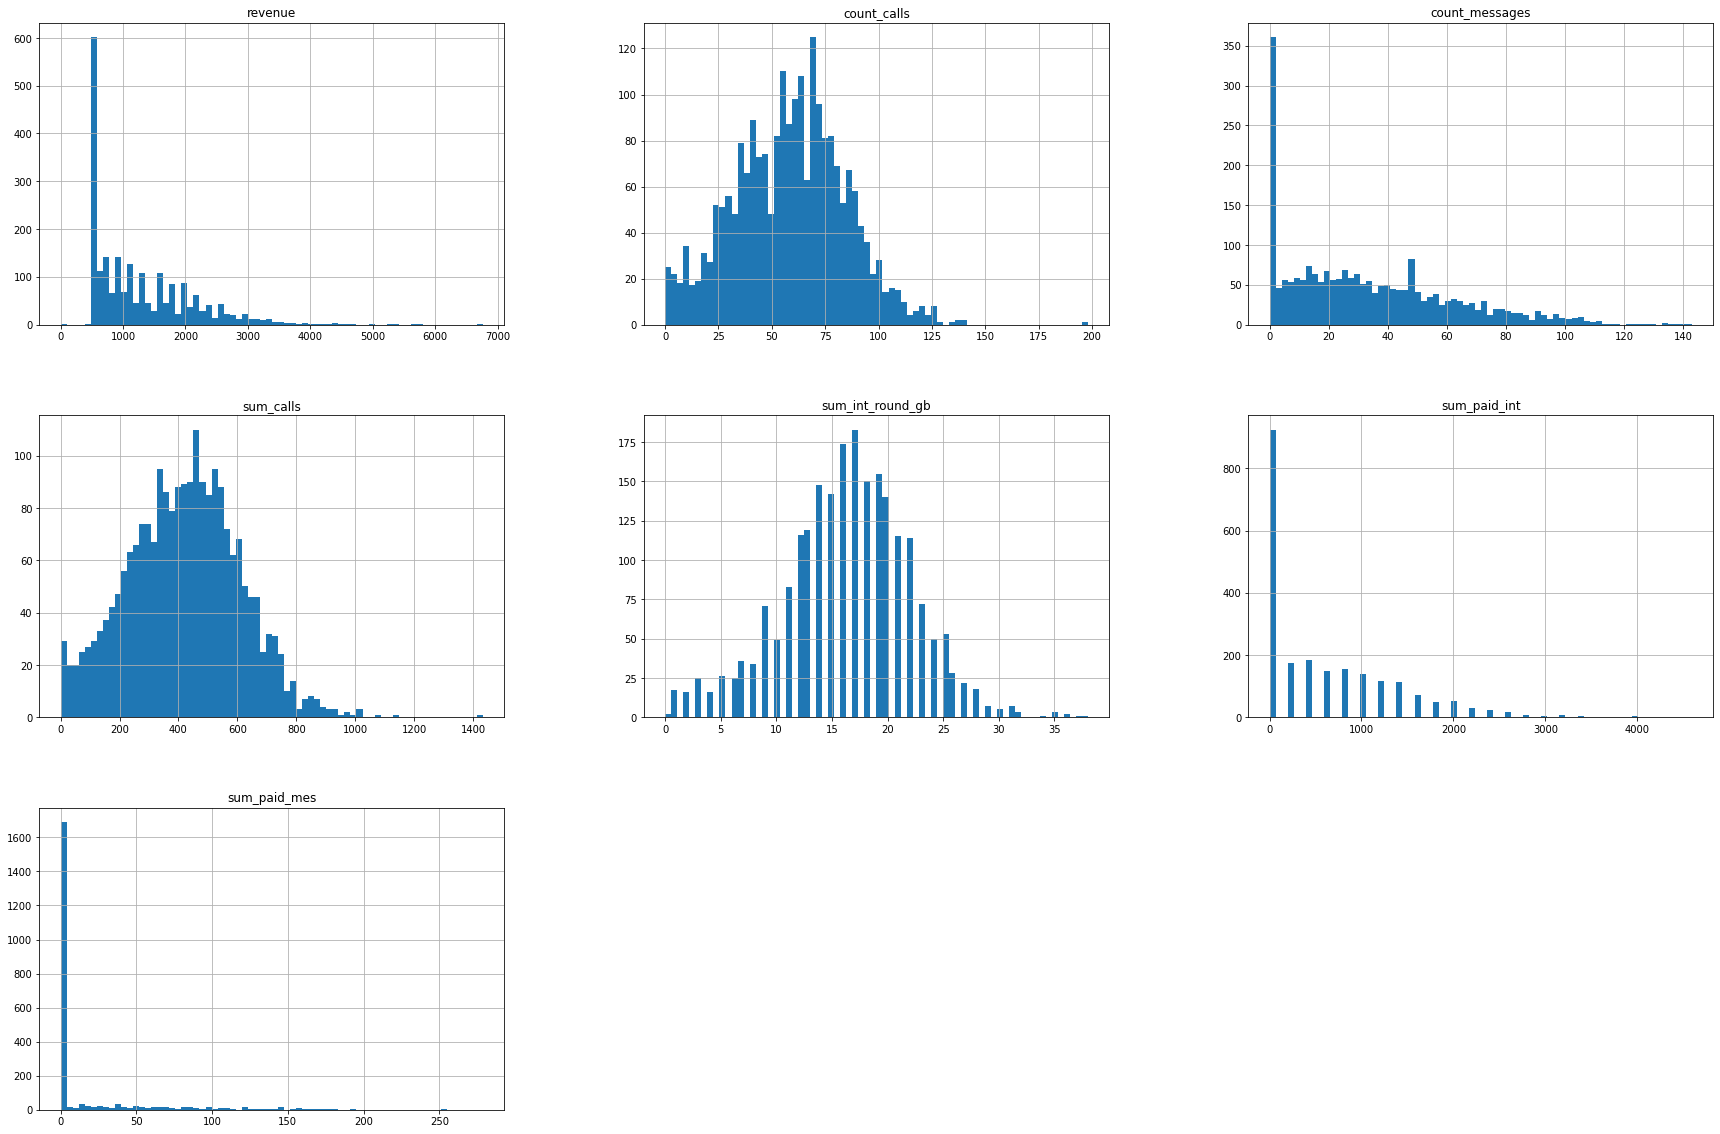

In [63]:
source['calls_int_mess_user'].query('tariff == "smart"').hist(figsize =(30,20),bins=70)

array([[<AxesSubplot:title={'center':'revenue'}>,
        <AxesSubplot:title={'center':'count_calls'}>,
        <AxesSubplot:title={'center':'count_messages'}>],
       [<AxesSubplot:title={'center':'sum_calls'}>,
        <AxesSubplot:title={'center':'sum_int_round_gb'}>,
        <AxesSubplot:title={'center':'sum_paid_int'}>],
       [<AxesSubplot:title={'center':'sum_paid_mes'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

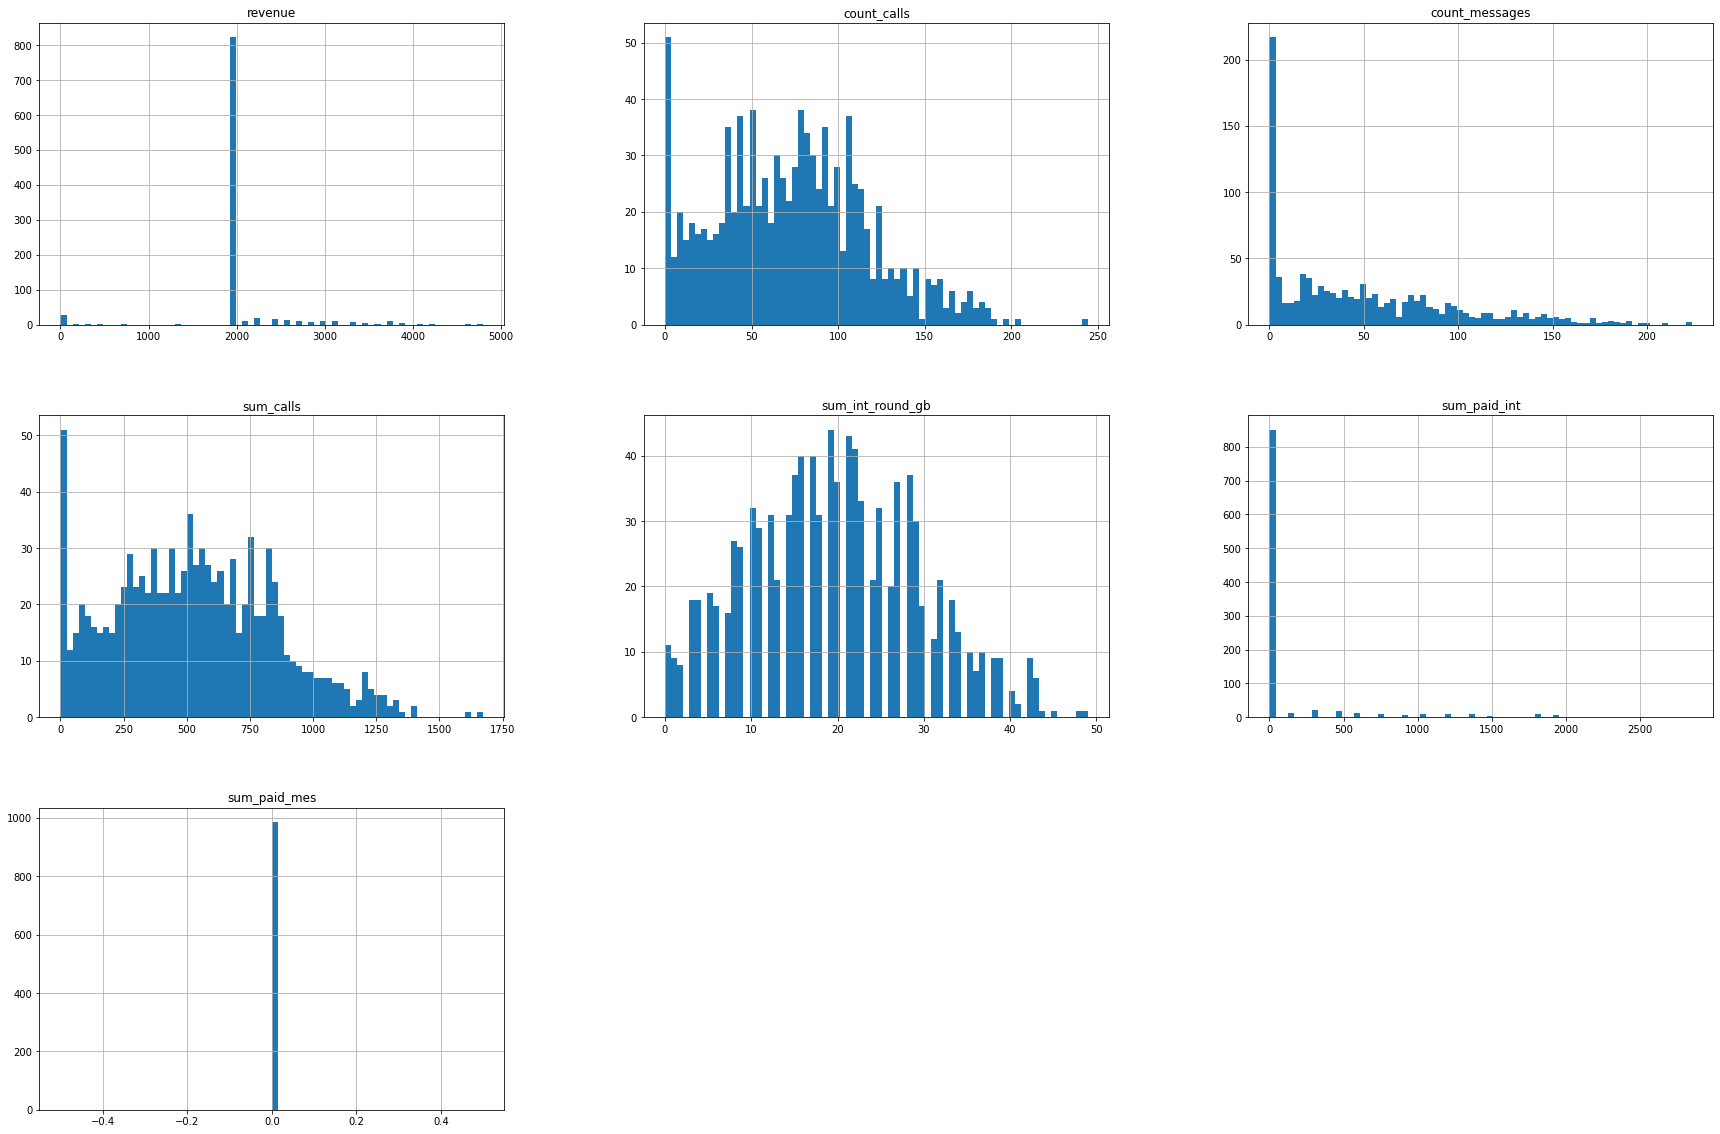

In [64]:
source['calls_int_mess_user'].query('tariff == "ultra"').hist(figsize =(30,20),bins=70)

#####   Опишите распределения.

Данные по распределениям, после отмены группировки датафрейма по месяцам, стали более близки к нормальным.

Дополнение:  
    данные по звонкам - звонки на тарифе Смарт и Ультра немного отличаются. 
    
    смс пользуется  большей популярностью на тарифе ультра, но доход от превышения оплаченного количества сообщений равен нулю, потому что порог (1000) очень высокий.
    
    интернет по максимальному потреблению на пользователя преобладает на тарифе смарт.
    
    Суммарно, выручка больше на Смарт, однако помесячная средняя выручка больше на Ультре.
    
    На тарифе Ультра пользователи почти полностью укладываются в лимиты по тарифу. Однако на Смарт, часто выходят за границы потребления и этим обусловлена существенная часть дополнительной выручки.

In [78]:
h1 = source['calls_int_mess_user'].pivot_table(index = ['tariff','month'],values='revenue', aggfunc = 'mean')

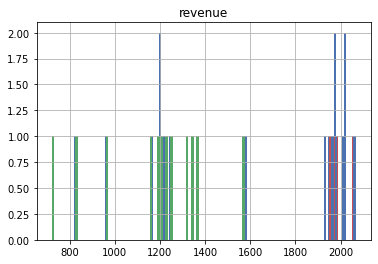

In [108]:
h1.hist(bins=150)

import matplotlib.pyplot as plt
plt.style.use('seaborn-deep')

x = h1.query('tariff == "smart"')
y = h1.query('tariff == "ultra"')

bins = 75#np.linspace(-500,500, 20)

plt.hist(x, bins)
plt.hist(y, bins)

plt.show()

In [109]:
h1


revenue
tariff month             
smart  1.0     721.323529
       2.0     827.603448
       3.0    1164.623377
       4.0     963.089286
       5.0    1197.510638
       6.0    1200.664634
       7.0    1223.950249
       8.0    1318.255319
       9.0    1247.830769
       10.0   1362.982993
       11.0   1341.306962
       12.0   1576.899110
ultra  1.0    1950.000000
       2.0    1975.000000
       3.0    2014.864865
       4.0    1930.909091
       5.0    1972.388060
       6.0    1969.642857
       7.0    2053.846154
       8.0    2010.280374
       9.0    1956.521739
       10.0   1986.585366
       11.0   2019.402985
       12.0   2068.705036

**Исправлено v4**, убрана группировка по месяцам, посчитана выручка

### Шаг 4. Проверьте гипотезы

##### средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются;

Нулевая гипотеза =  средняя выручка пользователей тарифов «Ультра» и «Смарт» равны.
Альтернативная гипотеза =  средняя выручка пользователей тарифов «Ультра» и «Смарт» отличаются.

In [66]:
source['calls_int_mess'].columns

Index(['user_id', 'month', 'sum_calls', 'count_calls', 'sum_paid_calls',
       'sum_int_round_gb', 'sum_paid_int', 'nums_mes', 'sum_paid_mes',
       'all_profit', 'age', 'churn_date', 'city', 'first_name', 'last_name',
       'reg_date', 'tariff', 'messages_included', 'mb_per_month_included',
       'minutes_included', 'rub_monthly_fee', 'rub_per_gb', 'rub_per_message',
       'rub_per_minute', 'tariff_name'],
      dtype='object')

In [67]:
#1. Берем 2 подвыборки (по одной для каждого из тарифов) с группировкой по месяцам
data_to_test_h0 = source['calls_int_mess_user'].query('tariff == "smart"')['revenue'].fillna(0)
data_to_test_h1 = source['calls_int_mess_user'].query('tariff == "ultra"')['revenue'].fillna(0)
data_to_test_h0

user_id  tariff  month
1001     smart   11.0     1150.0
                 12.0      550.0
1002     smart   6.0       550.0
                 7.0      1150.0
                 8.0      1550.0
                           ...  
1498     smart   10.0     1750.0
1499     smart   9.0       550.0
                 10.0     1150.0
                 11.0     1513.0
                 12.0      598.0
Name: revenue, Length: 2229, dtype: float64

In [68]:
from scipy import stats as st

alpha = .05 # критический уровень статистической значимости

# Нужен статистический тест, который сравнивает средние двух множеств
results = st.ttest_ind(data_to_test_h0, data_to_test_h1)
print('p-значение:',results.pvalue)

if results.pvalue<alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 5.324365255199966e-128
Отвергаем нулевую гипотезу


##### средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

In [69]:

def set_region(row):
    region = row['city']
    if region == 'Москва':
        return 'Москва'
    else:
        return 'другой регион'
    
    
    

In [70]:
source['calls_int_mess']['region']=source['calls_int_mess'].apply(set_region, axis=1)

In [71]:
source['calls_int_mess'].columns

Index(['user_id', 'month', 'sum_calls', 'count_calls', 'sum_paid_calls',
       'sum_int_round_gb', 'sum_paid_int', 'nums_mes', 'sum_paid_mes',
       'all_profit', 'age', 'churn_date', 'city', 'first_name', 'last_name',
       'reg_date', 'tariff', 'messages_included', 'mb_per_month_included',
       'minutes_included', 'rub_monthly_fee', 'rub_per_gb', 'rub_per_message',
       'rub_per_minute', 'tariff_name', 'region'],
      dtype='object')

In [72]:
source['calls_int_mess_region']=source['calls_int_mess'].pivot_table(index=('user_id','tariff','region','month'),values=(
    'all_profit',
'count_calls', 'sum_paid_calls',
    'sum_paid_int','nums_mes','sum_paid_mes'
),aggfunc=('sum'))

In [73]:
source['calls_int_mess_region'].reset_index(level='region')

region  all_profit  count_calls  nums_mes  \
user_id tariff month                                                     
1000    ultra  5.0    другой регион      1950.0         22.0      22.0   
               6.0    другой регион      1950.0         43.0      60.0   
               7.0    другой регион      1950.0         47.0      75.0   
               8.0    другой регион      1950.0         52.0      81.0   
               9.0    другой регион      1950.0         58.0      57.0   
...                             ...         ...          ...       ...   
1498    smart  10.0   другой регион      1750.0         41.0      42.0   
1499    smart  9.0    другой регион       550.0          9.0      11.0   
               10.0   другой регион      1150.0         68.0      48.0   
               11.0   другой регион      1513.0         74.0      59.0   
               12.0   другой регион       598.0         69.0      66.0   

                      sum_paid_calls  sum_paid_int  sum_paid_mes  
user_id tariff month                                              
1000    ultra  5.0            1950.0           0.0           0.0  
               6.0            1950.0           0.0           0.0  
               7.0            1950.0           0.0           0.0  
               8.0            1950.0           0.0           0.0  
               9.0            1950.0           0.0           0.0  
...                              ...           ...           ...  
1498    smart  10.0            550.0        1200.0           0.0  
1499    smart  9.0             550.0           0.0           0.0  
               10.0            550.0         600.0           0.0  
               11.0            886.0         600.0          27.0  
               12.0            550.0           0.0          48.0  

[3214 rows x 7 columns]

In [74]:
source['statistica_region']=source['calls_int_mess_region'].pivot_table(index=('region','month'), values='all_profit', aggfunc=( 'mean'))

In [75]:
display(source['statistica_region'])

all_profit
region        month             
Москва        1.0    1475.000000
              2.0    1175.142857
              3.0    1649.600000
              4.0    1436.068966
              5.0    1465.128205
              6.0    1500.723404
              7.0    1448.571429
              8.0    1600.709677
              9.0    1548.544118
              10.0   1547.790123
              11.0   1575.175824
              12.0   1647.406250
другой регион 1.0     865.000000
              2.0    1161.014706
              3.0    1396.106383
              4.0    1249.420290
              5.0    1442.952663
              6.0    1451.865672
              7.0    1490.652542
              8.0    1520.164286
              9.0    1446.693811
              10.0   1546.714286
              11.0   1535.130919
              12.0   1738.984211

Нулевая гипотеза =  средняя выручка пользователей из Москвы и выручки пользователей из других регионов равны.
Альтернативная гипотеза =   средняя выручка пользователей из Москвы и выручки пользователей из других регионов отличаются.

In [76]:
#1. Берем 2 подвыборки (по одной для каждого из тарифов) с группировкой по месяцам
data_to_test_h0 = source['calls_int_mess_region'].query('region == "Москва"')['all_profit'].fillna(0)
data_to_test_h1 = source['calls_int_mess_region'].query('region == "другой регион"')['all_profit'].fillna(0)
data_to_test_h0

user_id  tariff  region  month
1001     smart   Москва  11.0     1150.0
                         12.0      550.0
1003     ultra   Москва  8.0      1950.0
                         9.0      1950.0
                         10.0     1950.0
                                   ...  
1490     smart   Москва  8.0       950.0
                         9.0       550.0
                         10.0     1750.0
                         11.0     1350.0
                         12.0      750.0
Name: all_profit, Length: 611, dtype: float64

In [77]:
from scipy import stats as st


#interested_value_smart = 5455.094824

alpha = .05 # критический уровень статистической значимости

# Нужен статистический тест, который сравнивает средние двух множеств
results = st.ttest_ind(data_to_test_h0, data_to_test_h1)
print('p-значение:',results.pvalue)

if results.pvalue<alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.22138163330414307
Не получилось отвергнуть нулевую гипотезу


**Интерпретация** В результате статистических тестов мы получили уверенность в том, что гипотеза относительно совпадения дохода по тарифам опровергнута. 
Гипотеза по совпадению дохода других регионов и Москвы отвергнуть не удалось. 

### Шаг 5. Напишите общий вывод

Средняя выручка пользователей из Москвы и выручки пользователей из других регионов отличаются. Общее количество звонков их продолжительность больше на тарифе smart, однако на тарифе ультра это показывает что что эти тарифы отличаются кроме этого можно отметить что из других регионов на тарифе smart больше клиентов и это в общем-то влияет на общий доход, они больше тратят на звонки, за счет выхода за границы лимитов.

гипотезу о равенстве средней выручке удалось отвергнуть, следовательно  средняя выручка пользователей тарифов «Ультра» и «Смарт» могут отличаться.
гипотезу о равенстве выручи по регионам отвергнуть не удалось, следовательно можно предположить, что средняя выручка пользователей из Москвы и выручки пользователей из других регионов равны.

Таким образом, по данным проекта можно сделать вывод, что за счет большего количества клиентов на тарифе Смарт, выручка там больше, чем на тарифе Ультра, несмотря на то, что потребление услуг меньше.

Суммарно, выручка больше на Смарт, однако помесячная средняя выручка больше на Ультре.     На тарифе Ультра пользователи почти полностью укладываются в лимиты по тарифу. Однако на Смарт, часто выходят за границы потребления и этим обусловлена существенная часть дополнительной выручки.

**Исправлено v4**, убрана группировка по месяцам, посчитаны выручки пользователей из других регионов, дописан вывод

**Исправлено v5**  
- если мы привлечём 500 клиентов на тариф "Смарт" и 500 клиентов на тариф "Ультра", какой из вариантов привлечения окажется выгоднее для компании, "Смарт" или "Ультра"?

- При равном количестве клиентов для компании будет выгоднее тариф Ультра.